[0, 14.325, 28.73, 40.19, 50.98, 60.47, 67.96, 74.855, 80.795, 86.45, 91.47, 96.38, 100.88, 105.345, 109.285, 112.875, 116.395, 119.685, 122.775, 126.04, 128.865, 131.61, 134.43, 136.75, 139.665, 142.32, 145.025, 147.825, 150.255, 152.7, 154.91, 157.235, 159.62, 161.775, 163.985, 166.25, 168.67, 170.795, 172.695, 174.795, 176.765, 178.715, 180.735, 182.83, 184.91, 186.85, 188.665, 190.435, 192.475, 194.365, 196.255, 198.11, 199.94, 201.75, 203.565, 205.26, 207.165, 208.905, 210.69, 212.345, 214.025, 215.675, 217.26, 218.855, 220.315, 222.02, 223.61, 225.3, 226.97, 228.7, 230.295, 231.87, 233.46, 235.095, 236.52, 238.05, 239.495, 241.055, 242.62, 244.175, 245.74, 247.215, 248.82, 250.31, 251.695, 253.32, 254.61, 255.96, 257.475, 258.915, 260.43, 261.86, 263.29, 264.71, 266.165, 267.675, 269.08, 270.485, 271.86, 273.335, 274.485, 275.865, 277.14, 278.46, 279.715, 281.065, 282.455, 283.615, 284.9, 286.285, 287.56, 288.705, 290.025, 291.365, 292.62, 293.915, 295.085, 296.245, 297.59, 298.8

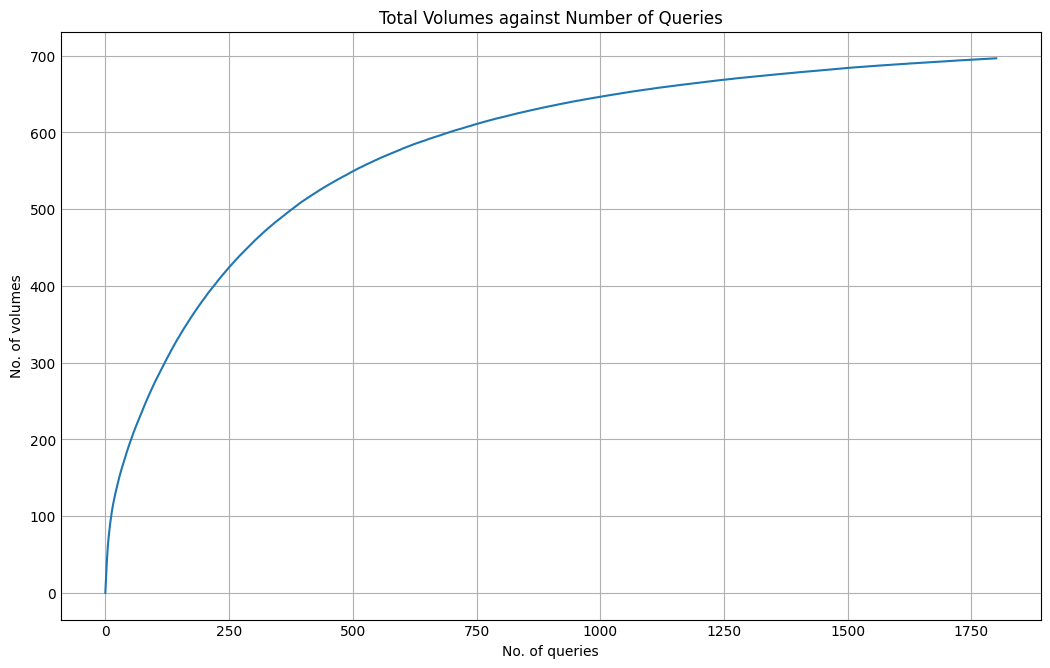

In [11]:
import math 
import random 
import matplotlib.pyplot as plt 

def query_gen():
    query_range_list = []
    for i in range (RSEmax):
        for j in range (i+1):
            query_range_list.append(j)
    no_range = random.choice(query_range_list)

    first_int = random.randint(1, RSEmax-no_range)
    query = (first_int, first_int+no_range)
    return(query)


def cover_log(start_int, end_int):
    c = 0
    query_list = []
    while start_int <= end_int:
        c = start_int
        for i in range(2, int(math.log(RSEmax, 2))+1):
            if end_int == start_int + 1:
                c = end_int
                break
            if start_int % 2 == 0:
                if end_int - start_int < 4:
                    c = start_int + 1
                    break
                else:
                    c = start_int
                    break
            if start_int + (2**i -1) > end_int:
                break
            else:    
                c = start_int + (2**i -1)
            if start_int % 2**(i-1) != 1:
                c = start_int + (2**(i-1) -1)
                break   
      
        node = (start_int, c)
        query_list.append(node)
        start_int = c+1
    return query_list

RSEmax = 256
max_volumes = 3*RSEmax - (math.log(RSEmax, 2)+2)
no_of_runs = 200
no_of_queries = 1800
def log_query(no_of_runs,no_of_queries):
    arr = [0 for i in range(no_of_queries+1)]
    for h in range(no_of_runs):
        vol_tracker = []
        vol_sum = 0
        query_tracker = []
        for j in range(no_of_queries):
            query_asked = query_gen()
            if len(vol_tracker) == max_volumes: 
                for i in range(max_volumes, no_of_queries):
                    arr[i+1] = max_volumes*no_of_runs
                break   
            if len(query_tracker) == int((RSEmax*(RSEmax + 1))/2):
                for i in range(int((RSEmax*(RSEmax + 1))/2), no_of_queries):
                    arr[i+1] = max_volumes*no_of_runs
                break   
            while query_asked in query_tracker:
                query_asked = query_gen()
            else:
                query_tracker.append(query_asked)
                (a,b) = query_asked
                query_list = cover_log(a,b)
                for i in query_list:
                    if i not in vol_tracker:
                        vol_tracker.append(i)
                        vol_sum +=1
                arr[j+1] = arr[j+1] + vol_sum
                
    for i in range(no_of_queries):
        arr[i+1] = arr[i+1] /no_of_runs
    print(arr)
    return(arr)

arr = log_query(no_of_runs,no_of_queries) 

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
plt.plot(arr)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()